# Testing Uber CoordConv layer Regression

In [1]:
from keras import layers, Model, Input
from keras.callbacks import EarlyStopping
from autoencoders.coord_conv import CoordinateChannel2D
from experiment_datasets.single_point import generate_single_point_coords

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [3]:
x_train, y_train, x_test, y_test = generate_single_point_coords(32, 32, validation_split=0.15)
DATASET_SIZE = x_train.shape[0]
VALIDATION_SIZE = x_test.shape[0]
INPUT_SHAPE = x_train.shape[1:]

In [4]:
ip = Input(shape=INPUT_SHAPE)
x = ip

x = CoordinateChannel2D()(ip)
x = layers.Conv2D(8, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(8, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(8, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = layers.GlobalAveragePooling2D()(x)

model_coord = Model(ip, x)
model_coord.compile(optimizer='adam', loss='mean_squared_error')
model_coord.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
coordinate_channel2d (Coordi (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         72        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         72        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 2)         146   

In [5]:
ip = Input(shape=INPUT_SHAPE)
x = ip

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(2, activation='relu')(x)

model_s = Model(ip, x)
model_s.compile(optimizer='adam', loss='mean_squared_error')
model_s.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0   

In [6]:
history_coord = model_coord.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_test, y_test)
)

oss: 94.6199
Epoch 6/200
28/28 [==============================] - 0s 6ms/step - loss: 85.3192 - val_loss: 93.7362
Epoch 7/200
28/28 [==============================] - 0s 5ms/step - loss: 84.2020 - val_loss: 93.7269
Epoch 8/200
28/28 [==============================] - 0s 5ms/step - loss: 83.1601 - val_loss: 93.7308
Epoch 9/200
28/28 [==============================] - 0s 5ms/step - loss: 82.5491 - val_loss: 94.1532
Epoch 10/200
28/28 [==============================] - 0s 5ms/step - loss: 85.5507 - val_loss: 93.7835
Epoch 11/200
28/28 [==============================] - 0s 5ms/step - loss: 86.4765 - val_loss: 93.7953
Epoch 12/200
28/28 [==============================] - 0s 5ms/step - loss: 82.5490 - val_loss: 94.2412
Epoch 13/200
28/28 [==============================] - 0s 5ms/step - loss: 85.0695 - val_loss: 93.7616
Epoch 14/200
28/28 [==============================] - 0s 5ms/step - loss: 84.9914 - val_loss: 93.7999
Epoch 15/200
28/28 [==============================] - 0s 5ms/step - loss:

In [7]:
history_s = model_s.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_test, y_test)
)

=======================] - 0s 8ms/step - loss: 177.9924 - val_loss: 165.4623
Epoch 3/200
28/28 [==============================] - 0s 7ms/step - loss: 172.3932 - val_loss: 157.3865
Epoch 4/200
28/28 [==============================] - 0s 6ms/step - loss: 176.8724 - val_loss: 155.7319
Epoch 5/200
28/28 [==============================] - 0s 7ms/step - loss: 169.7003 - val_loss: 154.1929
Epoch 6/200
28/28 [==============================] - 0s 8ms/step - loss: 163.6209 - val_loss: 153.5739
Epoch 7/200
28/28 [==============================] - 0s 7ms/step - loss: 170.0595 - val_loss: 153.3002
Epoch 8/200
28/28 [==============================] - 0s 8ms/step - loss: 156.4513 - val_loss: 36.5837
Epoch 9/200
28/28 [==============================] - 0s 8ms/step - loss: 22.5505 - val_loss: 6.4399
Epoch 10/200
28/28 [==============================] - 0s 8ms/step - loss: 6.0067 - val_loss: 1.9715
Epoch 11/200
28/28 [==============================] - 0s 8ms/step - loss: 2.2512 - val_loss: 1.0052
Epoch 

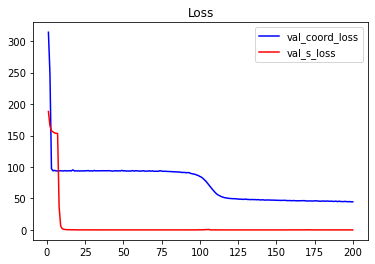

In [8]:
import matplotlib.pyplot as plt

val_loss_coord = history_coord.history['val_loss']
val_loss_s= history_s.history['val_loss']

epochs = range(1, len(val_loss_coord) + 1)

plt.plot(epochs, val_loss_coord, 'b', label='val_coord_loss')
plt.plot(epochs, val_loss_s, 'r', label='val_s_loss')
plt.title("Loss")
axes = plt.gca()
#axes.set_ylim([0, 2])
plt.legend()

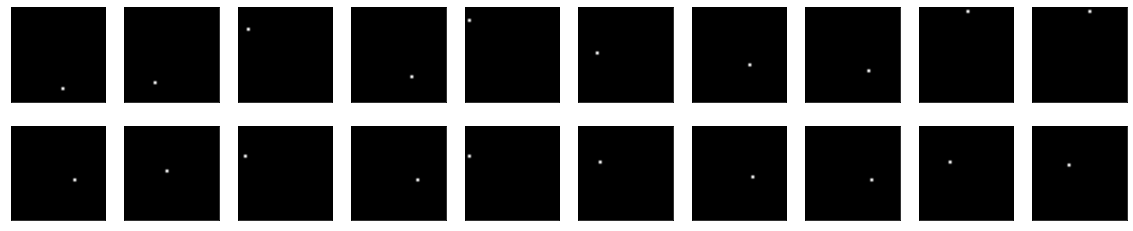

In [9]:
import random
import numpy as np
from experiment_datasets.single_point import generate_matrix_from_coords

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, VALIDATION_SIZE-1)
    images[i] = x_test[rand_img]

val_coords = model_coord.predict(images)

decoded_imgs = []
for c in val_coords:
    decoded_imgs.append(generate_matrix_from_coords(INPUT_SHAPE[0], INPUT_SHAPE[1], c).numpy())

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()